In [67]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import re

In [68]:
txt_list = []
#output_targets = glob.glob('./20210512/nhs199_1130/100368_20210512_nhs199_banding_2021_05_12_16_32_19/PREDiCT/output_targets/*/')
#output_targets = glob.glob('./20210512/nhs068_1230/vnir/raw/100195_20210512_nhs68_banding_2021_05_12_16_48_17/PREDiCT/output_targets/*/')
#output_targets = glob.glob('./20210512/nhs068_1350/vnir/raw/100197_20210512_nhs68_banding2_2021_05_12_18_03_16/PREDiCT/output_targets/*/')
#output_targets = glob.glob('./20210512/nhs068_1600/vnir/raw/100199_20210512_nhs68_banding_3_2021_05_12_20_15_49/PREDiCT/output_targets/*/')

#output_targets = glob.glob('./20210605/india_morning/100384_202w_2021_06_05_17_03_12/PREDiCT/output_targets/*/')
# output_targets = glob.glob('H:/Ender/banding/20210605/Gimbal/rad/Gimbal/gimbal_afternoon/100208_20200605GIMBAL0250_2021_06_05_18_51_25/PREDiCT/output_targets/*/')
# output_targets = glob.glob('H:/Ender/banding/20210605/Gimbal/rad/Gimbal/gimbal_morning/100203_20200605gimbal1228_2021_06_05_16_28_30/PREDiCT/output_targets/*/')
output_targets = glob.glob('H:/Ender/banding/20210605/Gimbal/rad/Gimbal/gimbal_solarnoon/100205_20200605GIMBAL0150_2021_06_05_17_50_58/PREDiCT/output_targets/*/')
for i in range(len(output_targets)):
    txt_list.extend( glob.glob(output_targets[i] + '*.txt') )

['Gryfn 11p 2021', 'Gryfn 30p 2021', 'Gryfn 56p 2021', 'Labsphere 50p 2018', 'Labsphere 80p 2019', 'Type8 11p 2020', 'Type8 30p 2020', 'Type8 56p 2020', 'Gryfn 30p 2021', 'Gryfn 56p 2021', 'Labsphere 50p 2018', 'Labsphere 50p 2019', 'Labsphere 80p 2019', 'Type8 11p 2020', 'Type8 30p 2020', 'Type8 56p 2020', 'Gryfn 30p 2021', 'Gryfn 56p 2021', 'Labsphere 50p 2018', 'Labsphere 50p 2019', 'Labsphere 80p 2019', 'Type8 11p 2020', 'Type8 56p 2020']


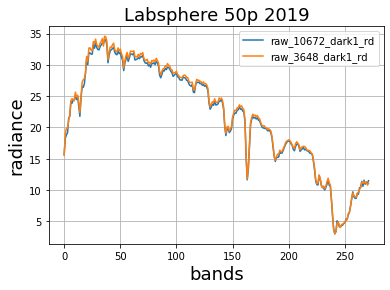

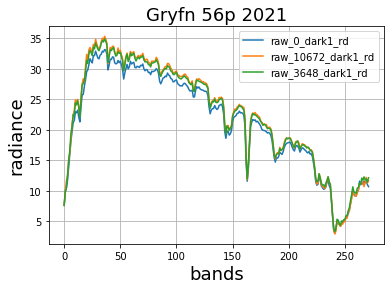

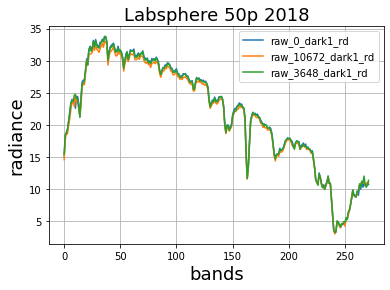

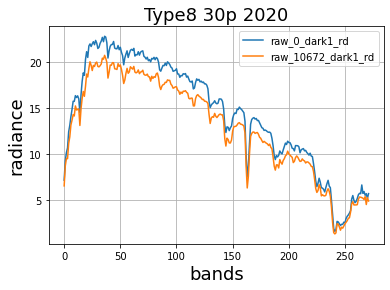

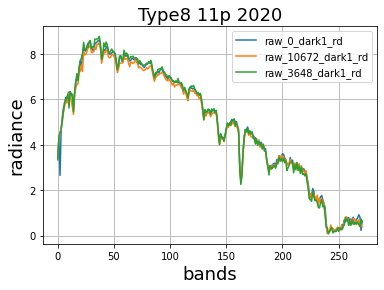

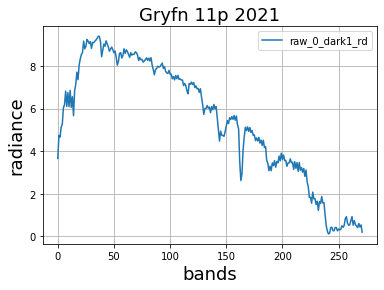

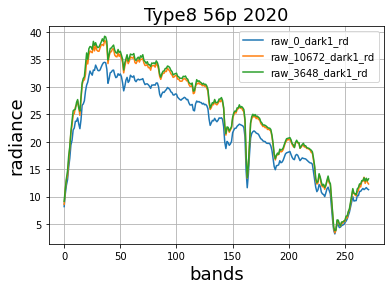

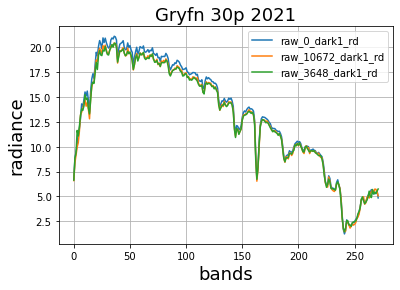

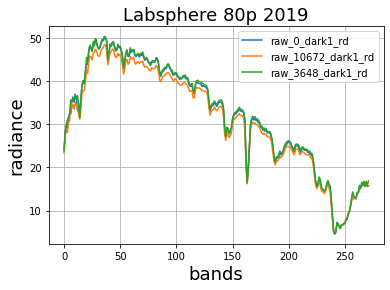

In [69]:
name_list = []
for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0]
    file = np.loadtxt(n,skiprows = 1)
    name_list.append(target_name)
print( name_list )
name_list = list( set(name_list) )
target_list = []
for i in range(len(name_list)):
    target_list.append(list([]))

for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0]
    cube_name = n.split('\\')[-2]
    #if cube_name == 'raw_1_rd':
    file = np.loadtxt(n,skiprows = 1)
    for t in range(len(name_list)):
        if target_name == name_list[t]:
            target_list[t].append(cube_name)
            target_list[t].append(file[:,1])

for i in range(len(name_list)):
    for j in range(int(len(target_list[i])/2)):
        plt.plot(target_list[i][j*2+1], label = target_list[i][j*2])
    plt.title(name_list[i],fontsize=18)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xlabel('bands',fontsize=18)
    plt.ylabel('radiance',fontsize=18)
    plt.show()

['11p', '30p', '56p', '50p', '80p', '11p', '30p', '56p', '30p', '56p', '50p', '50p', '80p', '11p', '30p', '56p', '30p', '56p', '50p', '50p', '80p', '11p', '56p']


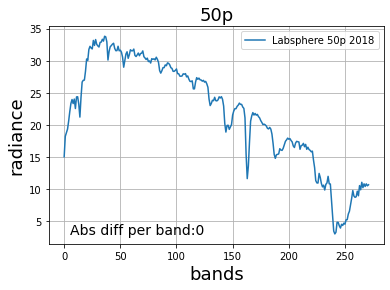

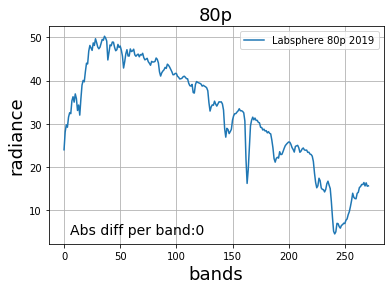

0.44


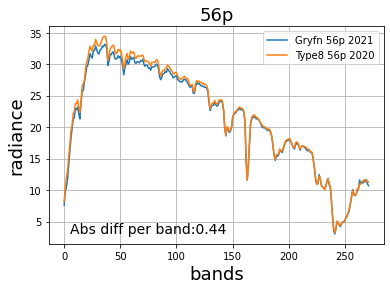

0.45


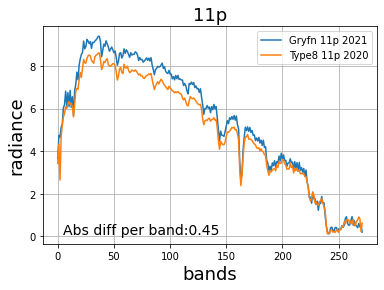

0.97


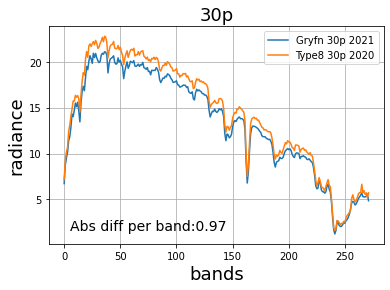

In [70]:
name_list = []
for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0][-8:-5]
    file = np.loadtxt(n,skiprows = 1)
    name_list.append(target_name)
print(name_list)
name_list = list( set(name_list) )
target_list = []
for i in range(len(name_list)):
    target_list.append(list([]))

for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0]
    cube_name = n.split('\\')[-2]
    if cube_name == 'raw_0_dark1_rd':
        file = np.loadtxt(n,skiprows = 1)
        for t in range(len(name_list)):
            if target_name[-8:-5] == name_list[t]:
                target_list[t].append(target_name)
                target_list[t].append(file[:,1])

for i in range(len(name_list)):
    abs_diff = 0
    if int(len(target_list[i])/2) > 1:
        abs_diff = round(np.abs(np.mean(target_list[i][1] - target_list[i][3])) * 100)/100
        print( abs_diff )
        
    for j in range(int(len(target_list[i])/2)):
        plt.plot(target_list[i][j*2+1], label = target_list[i][j*2])
    plt.title(name_list[i],fontsize=18)
    plt.legend(loc='upper right')
    plt.text(5,target_list[i][j*2+1].min(),'Abs diff per band:' + str(abs_diff), fontsize=14)
    plt.grid(True)
    plt.xlabel('bands',fontsize=18)
    plt.ylabel('radiance',fontsize=18)
    plt.show()

In [74]:
target_list
clear

NameError: name 'clear' is not defined

No handles with labels found to put in legend.


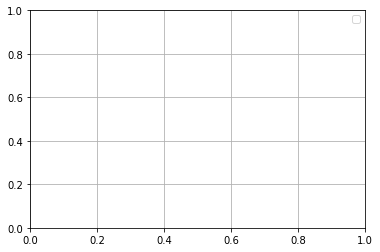

No handles with labels found to put in legend.


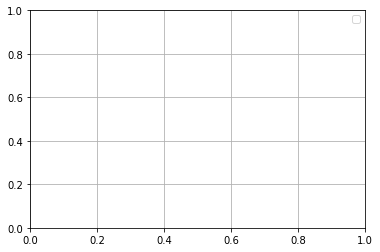

No handles with labels found to put in legend.


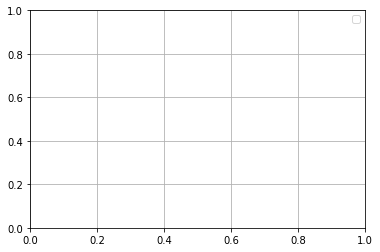

No handles with labels found to put in legend.


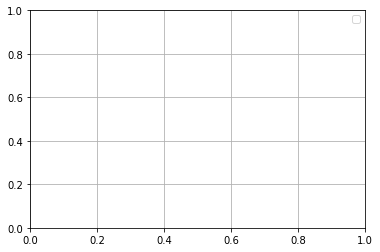

No handles with labels found to put in legend.


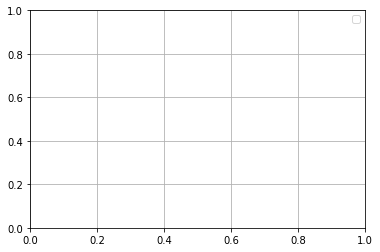

No handles with labels found to put in legend.


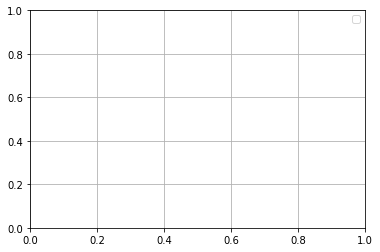

No handles with labels found to put in legend.


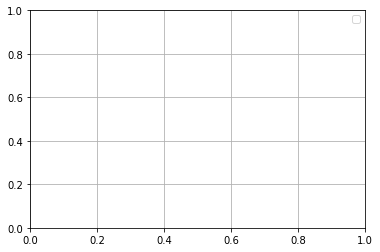

In [72]:
for i in range(int(len(Gryfn11)/2)):
    plt.title('Type8 11p')
    plt.plot(Gryfn11[i*2+1], label = Gryfn11[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int(min(Gryfn11[i*2+1])) - 1, int( max(Gryfn11[i*2+1]) ) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn30)/2)):
    plt.title('Type8 30p')
    plt.plot(Gryfn30[i*2+1], label = Gryfn30[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn30[i*2+1])) - 1, int( max(Gryfn30[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn56)/2)):
    plt.title('Type8 56p')
    plt.plot(Gryfn56[i*2+1], label = Gryfn56[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn56[i*2+1])) - 1, int( max(Gryfn56[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Labsphere5)/2)):
    plt.title('Labsphere 5p')
    plt.plot(Labsphere5[i*2+1], label = Labsphere5[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere5[i*2+1])) - 1, int( max(Labsphere5[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
    
for i in range(int(len(Labsphere50)/2)):
    plt.title('Labsphere 50p')
    plt.plot(Labsphere50[i*2+1], label = Labsphere50[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere50[i*2+1])) - 1, int( max(Labsphere50[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()


for i in range(int(len(Labsphere80)/2)):
    plt.title('Labsphere 80p')
    plt.plot(Labsphere80[i*2+1], label = Labsphere80[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere80[i*2+1])) - 1, int( max(Labsphere80[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()


for i in range(int(len(Gryfn_new)/2)):
    plt.title('Gryfn_new')
    plt.plot(Gryfn_new[i*2+1], label = Gryfn_new[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn_new[i*2+1])) - 1, int( max(Gryfn_new[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


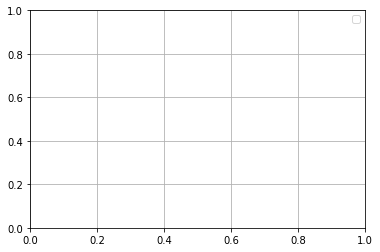

No handles with labels found to put in legend.


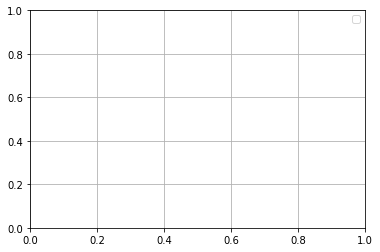

No handles with labels found to put in legend.


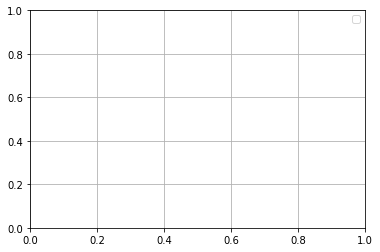

No handles with labels found to put in legend.


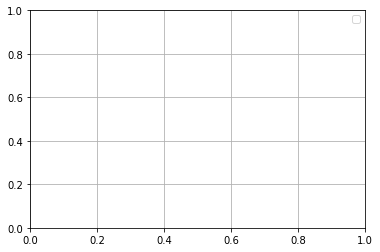

No handles with labels found to put in legend.


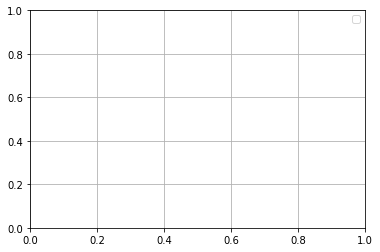

No handles with labels found to put in legend.


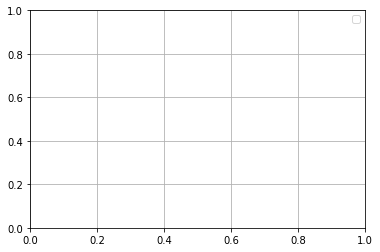

No handles with labels found to put in legend.


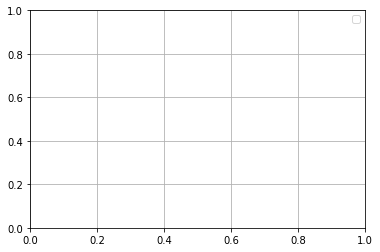

In [73]:
name_list = []
for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0][:-5]
    file = np.loadtxt(n,skiprows = 1)
    name_list.append(target_name)

name_list = list( set(name_list) )
Gryfn11 = []
Gryfn30 = []
Gryfn56 = []
Labsphere5 = []
Labsphere50 = []
Labsphere80 = []
Gryfn_new = []

for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0][:-5]
    cube_name = n.split('\\')[-2]
    if cube_name == 'raw_6864_rd' or cube_name == 'raw_2272_rd':
        file = np.loadtxt(n,skiprows = 1)
        if target_name == 'Gryfn 11p':
            Gryfn11.append(cube_name)
            Gryfn11.append(file[:,1])
        elif target_name == 'Gryfn 30p':
            Gryfn30.append(cube_name)
            Gryfn30.append(file[:,1])
        elif target_name == 'Gryfn 56p':
            Gryfn56.append(cube_name)
            Gryfn56.append(file[:,1])
        elif target_name == 'Labsphere 5p':
            Labsphere5.append(cube_name)
            Labsphere5.append(file[:,1])
        elif target_name == 'Labsphere 50p':
            Labsphere50.append(cube_name)
            Labsphere50.append(file[:,1])
        elif target_name == 'Labsphere 80p':
            Labsphere80.append(cube_name)
            Labsphere80.append(file[:,1])
        elif target_name == 'Gryfn new':
            Gryfn_new.append(cube_name)
            Gryfn_new.append(file[:,1])
        
for i in range(int(len(Gryfn11)/2)):
    plt.title('Type8 11p')
    plt.plot(Gryfn11[i*2+1], label = Gryfn11[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int(min(Gryfn11[i*2+1])) - 1, int( max(Gryfn11[i*2+1]) ) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn30)/2)):
    plt.title('Type8 30p')
    plt.plot(Gryfn30[i*2+1], label = Gryfn30[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn30[i*2+1])) - 1, int( max(Gryfn30[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn56)/2)):
    plt.title('Type8 56p')
    plt.plot(Gryfn56[i*2+1], label = Gryfn56[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn56[i*2+1])) - 1, int( max(Gryfn56[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Labsphere5)/2)):
    plt.title('Labsphere 5p')
    plt.plot(Labsphere5[i*2+1], label = Labsphere5[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere5[i*2+1])) - 1, int( max(Labsphere5[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
    
for i in range(int(len(Labsphere50)/2)):
    plt.title('Labsphere 50p')
    plt.plot(Labsphere50[i*2+1], label = Labsphere50[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere50[i*2+1])) - 1, int( max(Labsphere50[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()


for i in range(int(len(Labsphere80)/2)):
    plt.title('Labsphere 80p')
    plt.plot(Labsphere80[i*2+1], label = Labsphere80[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere80[i*2+1])) - 1, int( max(Labsphere80[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()


for i in range(int(len(Gryfn_new)/2)):
    plt.title('Gryfn_new')
    plt.plot(Gryfn_new[i*2+1], label = Gryfn_new[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn_new[i*2+1])) - 1, int( max(Gryfn_new[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()

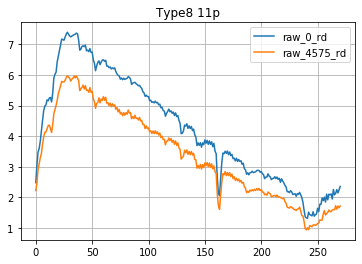

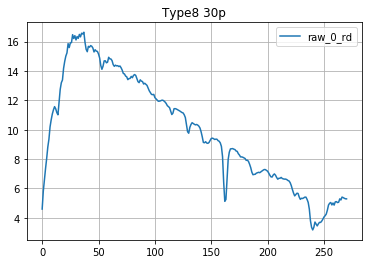

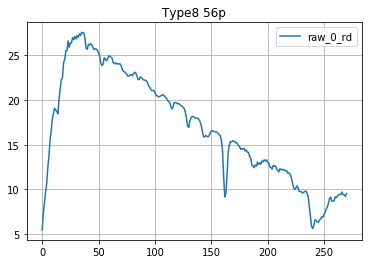

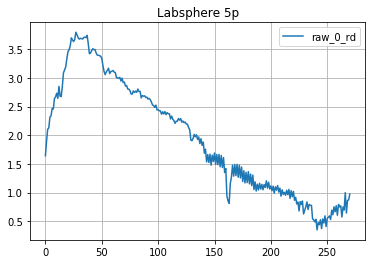

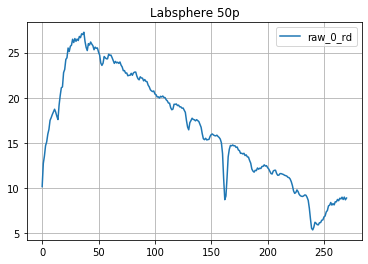

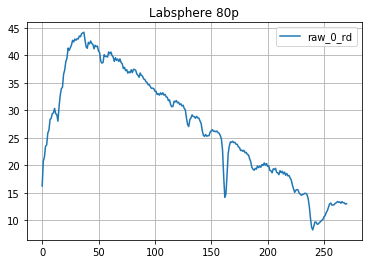

No handles with labels found to put in legend.


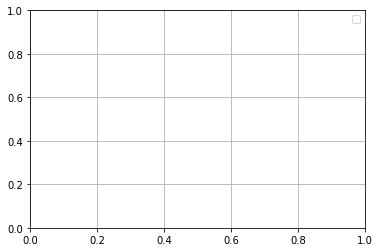

In [5]:
txt_list = []
#output_targets = glob.glob('./20210512/nhs199_gryfn_1153/output_targets/*/')
#output_targets = glob.glob('./20210512/nhs199_gryfn_1343/output_targets/*/')
#output_targets = glob.glob('./20210512/nhs199_gryfn_1546/output_targets/*/')
for i in range(len(output_targets)):
    txt_list.extend( glob.glob(output_targets[i] + '*.txt') )

name_list = []
for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0][:-5]
    file = np.loadtxt(n,skiprows = 1)
    name_list.append(target_name)

name_list = list( set(name_list) )
Gryfn11 = []
Gryfn30 = []
Gryfn56 = []
Labsphere5 = []
Labsphere50 = []
Labsphere80 = []
Gryfn_new = []

for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0][:-5]
    cube_name = n.split('\\')[-2]
    if cube_name == 'raw_0_rd' or cube_name == 'raw_4575_rd':
        file = np.loadtxt(n,skiprows = 1)
        if target_name == 'Type8 11p':
            Gryfn11.append(cube_name)
            Gryfn11.append(file[:,1])
        elif target_name == 'Type8 30p':
            Gryfn30.append(cube_name)
            Gryfn30.append(file[:,1])
        elif target_name == 'Type8 56p':
            Gryfn56.append(cube_name)
            Gryfn56.append(file[:,1])
        elif target_name == 'Labsphere 5p':
            Labsphere5.append(cube_name)
            Labsphere5.append(file[:,1])
        elif target_name == 'Labsphere 50p':
            Labsphere50.append(cube_name)
            Labsphere50.append(file[:,1])
        elif target_name == 'Labsphere 80p':
            Labsphere80.append(cube_name)
            Labsphere80.append(file[:,1])
        elif target_name == 'Gryfn new':
            Gryfn_new.append(cube_name)
            Gryfn_new.append(file[:,1])
        
for i in range(int(len(Gryfn11)/2)):
    plt.title('Type8 11p')
    plt.plot(Gryfn11[i*2+1], label = Gryfn11[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int(min(Gryfn11[i*2+1])) - 1, int( max(Gryfn11[i*2+1]) ) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn30)/2)):
    plt.title('Type8 30p')
    plt.plot(Gryfn30[i*2+1], label = Gryfn30[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn30[i*2+1])) - 1, int( max(Gryfn30[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn56)/2)):
    plt.title('Type8 56p')
    plt.plot(Gryfn56[i*2+1], label = Gryfn56[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn56[i*2+1])) - 1, int( max(Gryfn56[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
for i in range(int(len(Labsphere5)/2)):
    plt.title('Labsphere 5p')
    plt.plot(Labsphere5[i*2+1], label = Labsphere5[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere5[i*2+1])) - 1, int( max(Labsphere5[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()
    
    
for i in range(int(len(Labsphere50)/2)):
    plt.title('Labsphere 50p')
    plt.plot(Labsphere50[i*2+1], label = Labsphere50[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere50[i*2+1])) - 1, int( max(Labsphere50[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()


for i in range(int(len(Labsphere80)/2)):
    plt.title('Labsphere 80p')
    plt.plot(Labsphere80[i*2+1], label = Labsphere80[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Labsphere80[i*2+1])) - 1, int( max(Labsphere80[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()


for i in range(int(len(Gryfn_new)/2)):
    plt.title('Gryfn_new')
    plt.plot(Gryfn_new[i*2+1], label = Gryfn_new[i*2])
plt.legend(loc='upper right')
#plt.yticks(np.arange(int( min(Gryfn_new[i*2+1])) - 1, int( max(Gryfn_new[i*2+1])) + 2, 1.0))
plt.grid(True)
plt.show()

In [63]:
txt_list = []
txt_list.extend( glob.glob('./output_targets/raw_0_rd/*.txt') )
txt_list.extend( glob.glob('./output_targets/raw_2176_rd/*.txt') )
txt_list.extend( glob.glob('./output_targets/raw_5120_rd/*.txt') )

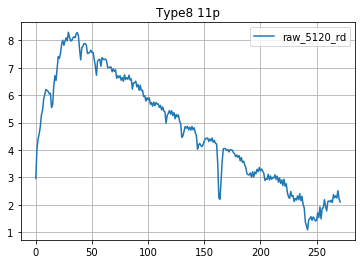

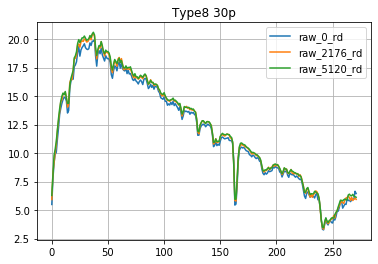

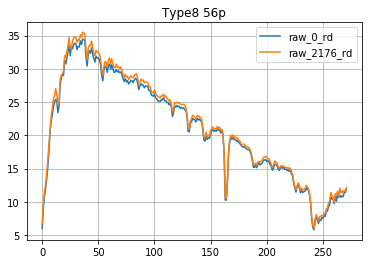

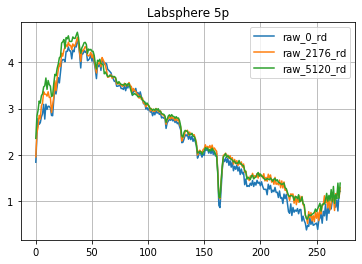

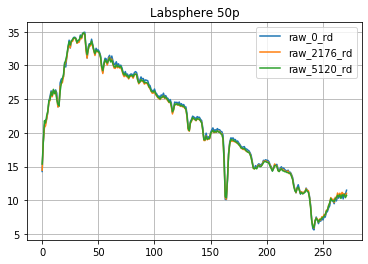

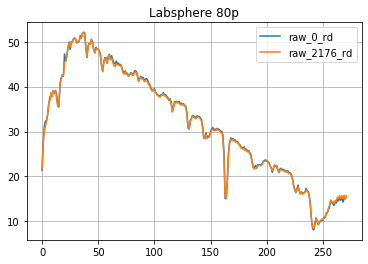

In [64]:
name_list = []
for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0][:-5]
    file = np.loadtxt(n,skiprows = 1)
    name_list.append(target_name)

name_list = list( set(name_list) )
Gryfn11 = []
Gryfn30 = []
Gryfn50 = []
Labsphere12 = []
Labsphere50 = []
Labsphere80 = []

for n in txt_list:
    target_name = n.split('\\')[-1].split('_')[0][:-5]
    cube_name = n.split('\\')[0].split('/')[-1]
    file = np.loadtxt(n,skiprows = 1)
    if target_name == 'Gryfn 11p':
        Gryfn11.append(cube_name)
        Gryfn11.append(file[:,1])
    elif target_name == 'Gryfn 30p':
        Gryfn30.append(cube_name)
        Gryfn30.append(file[:,1])
    elif target_name == 'Gryfn 56p':
        Gryfn50.append(cube_name)
        Gryfn50.append(file[:,1])
    elif target_name == 'Labsphere 12p':
        Labsphere12.append(cube_name)
        Labsphere12.append(file[:,1])
    elif target_name == 'Labsphere 50p':
        Labsphere50.append(cube_name)
        Labsphere50.append(file[:,1])
    elif target_name == 'Labsphere 80p':
        Labsphere80.append(cube_name)
        Labsphere80.append(file[:,1])
        
for i in range(int(len(Gryfn11)/2)):
    plt.title('Type8 11p')
    plt.plot(Gryfn11[i*2+1], label = Gryfn11[i*2])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn30)/2)):
    plt.title('Type8 30p')
    plt.plot(Gryfn30[i*2+1], label = Gryfn30[i*2])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    
for i in range(int(len(Gryfn50)/2)):
    plt.title('Type8 56p')
    plt.plot(Gryfn50[i*2+1], label = Gryfn50[i*2])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    
for i in range(int(len(Labsphere12)/2)):
    plt.title('Labsphere 5p')
    plt.plot(Labsphere12[i*2+1], label = Labsphere12[i*2])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    
    
for i in range(int(len(Labsphere50)/2)):
    plt.title('Labsphere 50p')
    plt.plot(Labsphere50[i*2+1], label = Labsphere50[i*2])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    
for i in range(int(len(Labsphere80)/2)):
    plt.title('Labsphere 80p')
    plt.plot(Labsphere80[i*2+1], label = Labsphere80[i*2])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()